In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('DatosfiltradosII.csv', header = 0)
data.head()

,Unnamed: 0,Cod.Car.Sec,Aprobado,Anho.Firma,Primer.Par,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final
0,0,CIV-PLS13,0,0,7,0,0,0,0,NaN
1,1,MCT-PLS13,1,2017,18,15,0,0,0,1F-2
2,2,CIV-PLS13,0,0,13,0,0,0,0,NaN
3,3,CIV-PLS13,0,0,0,0,0,0,0,NaN
4,4,IND-PLS13,0,0,4,8,0,0,0,NaN


In [3]:
data=data.drop(columns=['Cod.Car.Sec','Unnamed: 0','Nota.Final','Anho.Firma'])

In [4]:
#data['Anho.Firma']=np.where(data['Anho.Firma']>0,1,data['Anho.Firma'])

In [5]:
#for x in range(1897):
    #data['Nota.Final'].values[x]= str(data['Nota.Final'].values[x]).split(",")[-1].split("-")[-1]

In [6]:
#data['Nota.Final']=np.where(data['Nota.Final']=='nan',0,data['Nota.Final'])
#data['Nota.Final']=data['Nota.Final'].apply(pd.to_numeric) 


<AxesSubplot:>

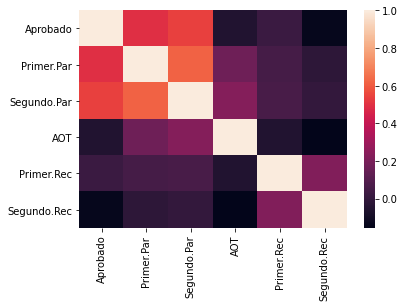

In [7]:
sns.heatmap(data.corr())

In [8]:
X_train,X_test,y_train,y_test=train_test_split(data.drop('Aprobado',axis=1),data['Aprobado'],test_size=0.5) # con 0.5 se encontro la mejores metricas

In [9]:
LogReg= LogisticRegression(solver='lbfgs',max_iter=1050)
LogReg.fit(X_train,y_train)
print(X_train.columns)

Index(['Primer.Par', 'Segundo.Par', 'AOT', 'Primer.Rec', 'Segundo.Rec'], dtype='object')


In [10]:
from sklearn.metrics import confusion_matrix
y_pred=LogReg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[558  81]
 [ 69 241]]


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test.T,y_pred.T))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       639
           1       0.75      0.78      0.76       310

    accuracy                           0.84       949
   macro avg       0.82      0.83      0.82       949
weighted avg       0.84      0.84      0.84       949



In [12]:
from sklearn.metrics import accuracy_score
exactitud4=accuracy_score(y_test.T,y_pred.T)*100
print('Exactitud del modelo: ',exactitud4,' %')

Exactitud del modelo:  84.19388830347735  %
